In [15]:
import numpy as np
import tools

Nscale_points = 7
Nscale_map = np.linspace(0, 3, Nscale_points)

ZA_points = 7
airmass_map = np.linspace(1, tools.calc_air_mass(75), ZA_points)
# ZA_map scaling with linear air_mass
ZA_map = tools.calc_zenith(airmass_map)

freq_points = 240001
Tb_scalar_field = np.zeros((Nscale_points, ZA_points, freq_points))
Nscale_jacobian = np.zeros((Nscale_points, ZA_points, freq_points))
airmass_jacobian = np.zeros((Nscale_points, ZA_points, freq_points))

# Load interpolation & jacobian data
for idx, Nscale in enumerate(Nscale_map):
    for jdx, airmass in enumerate(airmass_map):

        filename = f'MaunaKea_Tb_Spectrum_{airmass:.1f}_{Nscale:.1f}'
        data = np.load(f'{filename}.out')

        freq_map = data[:,0]
        
        # Second column is Tb in K
        Tb_scalar_field[idx,jdx] = data[:,2]

        # Jacobian
        conversation_factor = 2109.86 * 10**-3
        Nscale_jacobian[idx,jdx] = (data[:,4] / conversation_factor)

        ZA = tools.calc_zenith(airmass)
        airmass_jacobian[idx,jdx] = (data[:,3]) * (np.sin(ZA)/(np.cos(ZA))**2)


In [16]:
from scipy.interpolate import CubicHermiteSpline

for idx, NSCALE in enumerate(Nscale_map):
    interp_func = CubicHermiteSpline(x=airmass_map[::2],
                                     y=Tb_scalar_field[idx,::2],
                                     dydx=airmass_jacobian[idx,::2])
    
    points = np.meshgrid(airmass_map)

    eval_grid = interp_func(points).reshape(airmass_jacobian[idx].shape)
    


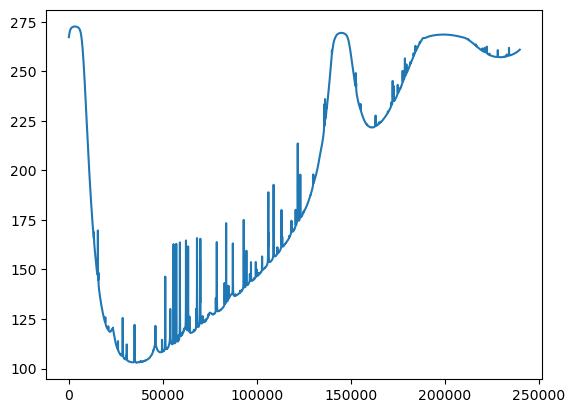

In [17]:
import matplotlib.pyplot as plt

plt.plot(eval_grid[2])

In [24]:
interp_func = CubicHermiteSpline(x=air_masses_map[::2], y=Tb_scalar_field[0,::2],dydx=AM_jacobian[0,::2])

In [26]:
eval_grid.shape

(7, 240001)

In [25]:
Tb_scalar_field[0,::2].shape

(4, 240001)

In [30]:
air_masses_map[::2].shape

(4,)

In [28]:
AM_jacobian[0].shape

(7, 240001)